In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('/content/Dataset salary 2024.csv')

In [54]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
9610,2023,SE,FT,Data Strategy Manager,90000,USD,90000,US,100,US,M
8780,2023,SE,FT,Machine Learning Engineer,240000,USD,240000,UA,100,UA,M
11871,2023,SE,FT,Applied Scientist,184000,USD,184000,US,0,US,M
9616,2023,SE,FT,Machine Learning Engineer,123800,USD,123800,US,100,US,M
13877,2023,SE,FT,Data Scientist,82365,USD,82365,US,0,US,M
11778,2023,EX,FT,Data Engineer,130000,USD,130000,US,0,US,M
10629,2023,MI,FT,AI Research Engineer,150000,USD,150000,TN,100,US,M
2556,2024,SE,FT,Data Science,240000,USD,240000,US,0,US,M
15289,2022,SE,FT,Data Scientist,159699,USD,159699,US,0,US,M
9249,2023,MI,FT,Machine Learning Engineer,200000,USD,200000,US,0,US,M


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [56]:
df.drop('salary_currency',axis=1,inplace=True)

In [57]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [58]:
df.duplicated().sum()

np.int64(6421)

In [59]:
df = df.drop(columns=["salary"])

In [60]:
num_cols = df.select_dtypes(include="number").columns.tolist()
df[num_cols].corr().round(3)

,work_year,salary_in_usd,remote_ratio
work_year,1.000,0.078,-0.200
salary_in_usd,0.078,1.000,-0.057
remote_ratio,-0.200,-0.057,1.000


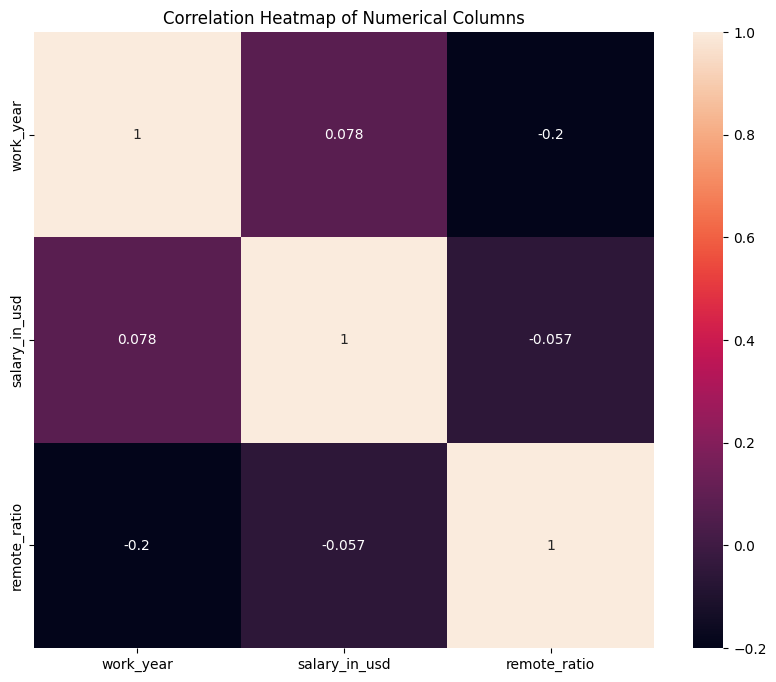

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [62]:
df['job_title'].value_counts().head(20)

,count
job_title,
Data Engineer,3464
Data Scientist,3314
Data Analyst,2440
Machine Learning Engineer,1705
Research Scientist,531
Applied Scientist,435
Data Architect,435
Analytics Engineer,431
Research Engineer,306


In [64]:
top_10_job_titles = df['job_title'].value_counts().nlargest(10).index
top_10_job_titles

Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist', 'Applied Scientist',
       'Data Architect', 'Analytics Engineer', 'Research Engineer',
       'Data Science'],
      dtype='object', name='job_title')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary_in_usd       16534 non-null  int64 
 5   employee_residence  16534 non-null  object
 6   remote_ratio        16534 non-null  int64 
 7   company_location    16534 non-null  object
 8   company_size        16534 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


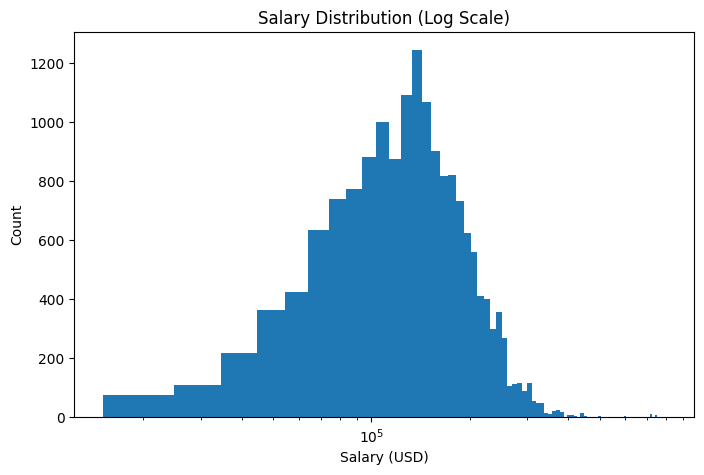

In [68]:
plt.figure(figsize=(8,5))
plt.hist(df["salary_in_usd"], bins=80)
plt.xscale("log")
plt.title("Salary Distribution (Log Scale)")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-4179816014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x="job_title", y="salary_in_usd",palette="Set2" )


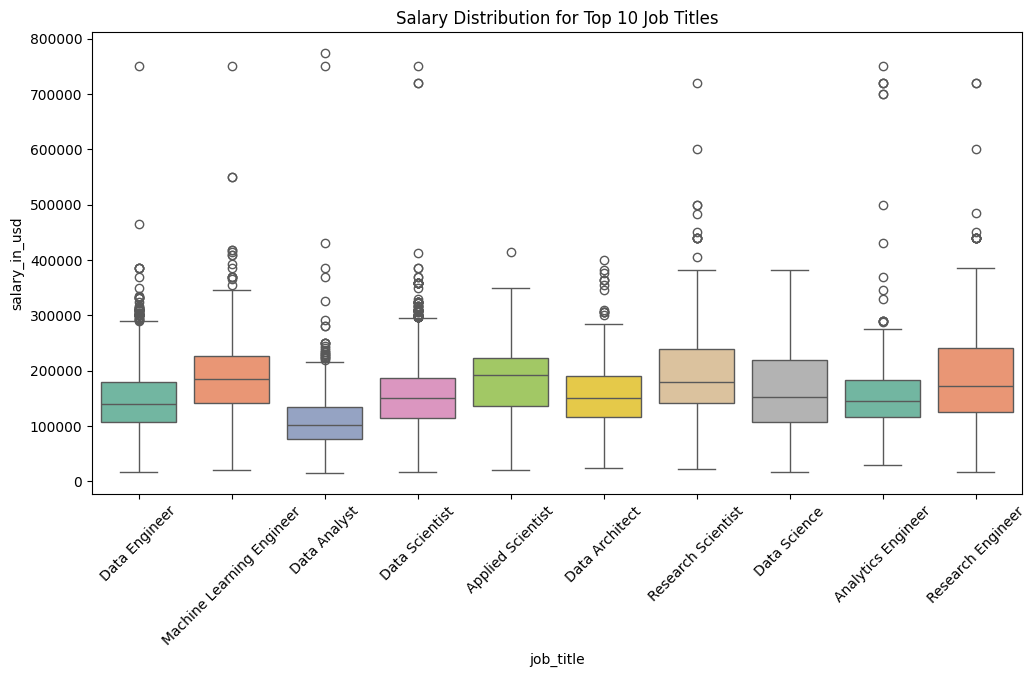

In [78]:
top10 = df['job_title'].value_counts().nlargest(10).index
df_top10 = df[df['job_title'].isin(top10)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top10, x="job_title", y="salary_in_usd",palette="Set2" )
plt.xticks(rotation=45)
plt.title("Salary Distribution for Top 10 Job Titles")
plt.show()

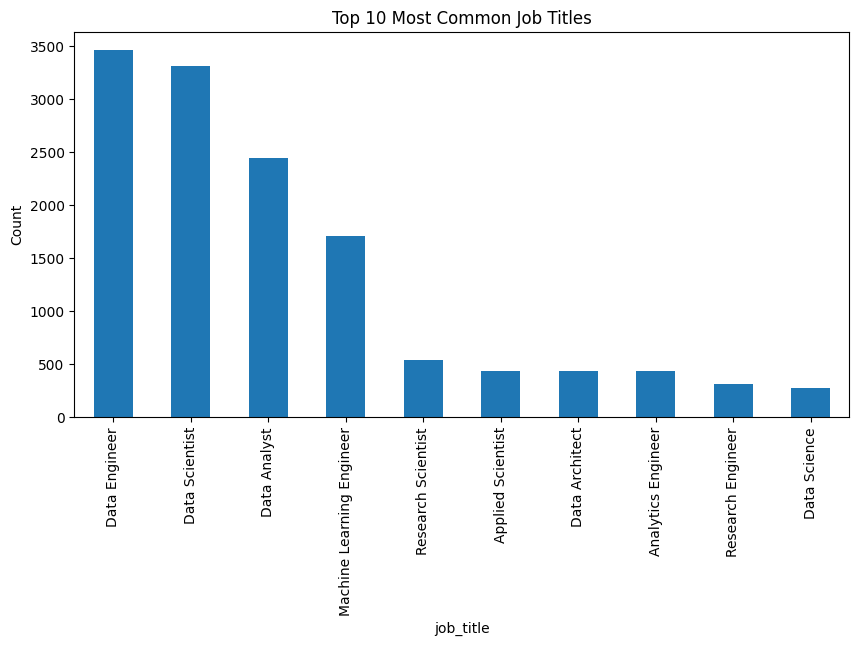

In [74]:
plt.figure(figsize=(10,5))
df['job_title'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Most Common Job Titles")
plt.ylabel("Count")
plt.show()

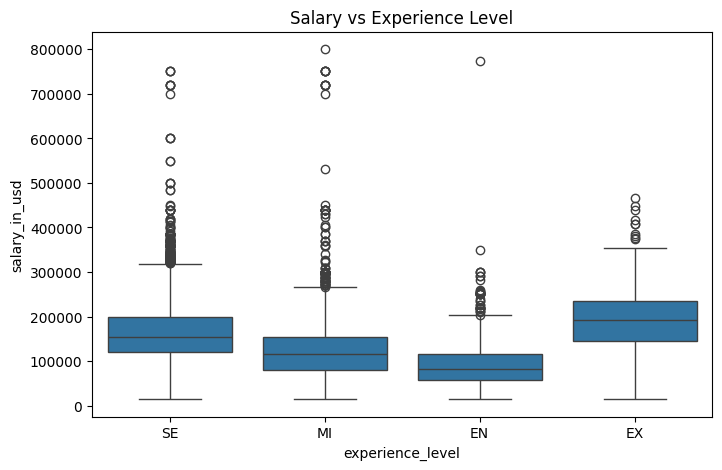

In [70]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="experience_level", y="salary_in_usd")
plt.title("Salary vs Experience Level")
plt.show()


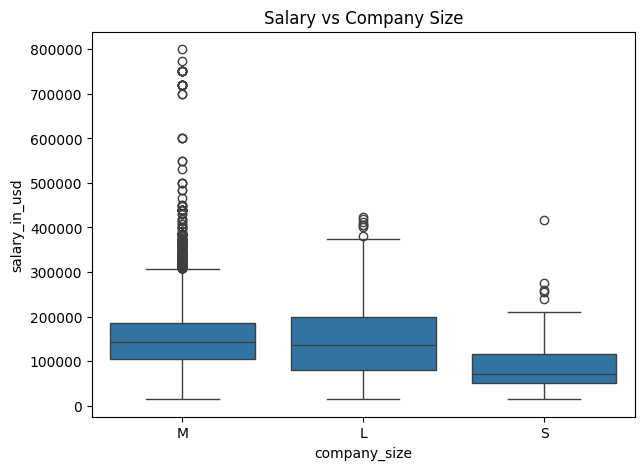

In [72]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="company_size", y="salary_in_usd")
plt.title("Salary vs Company Size")
plt.show()

/tmp/ipython-input-1745325710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_c, x="company_location", y="salary_in_usd",palette="Set2")


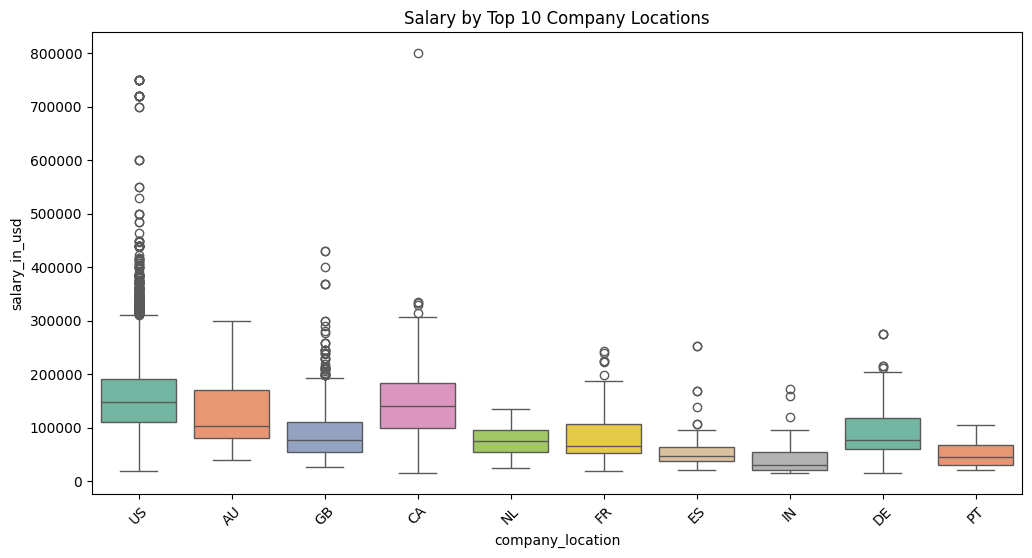

In [77]:
top_countries = df['company_location'].value_counts().nlargest(10).index
df_c = df[df['company_location'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_c, x="company_location", y="salary_in_usd",palette="Set2")
plt.xticks(rotation=45)
plt.title("Salary by Top 10 Company Locations")
plt.show()


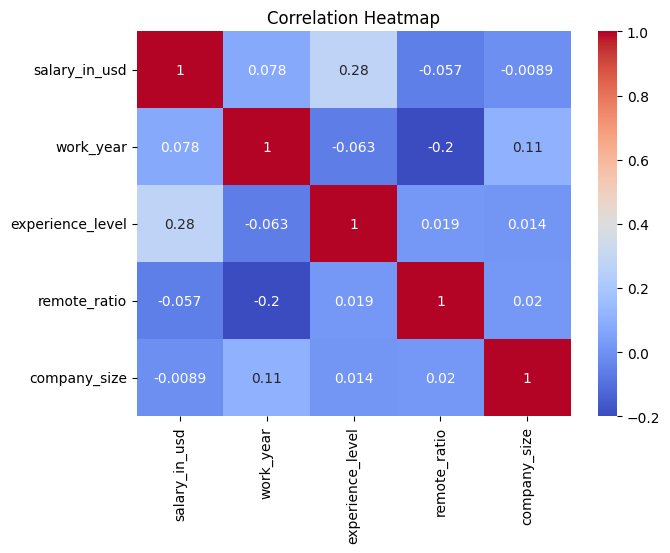

In [75]:
num_df = df.copy()
num_df['company_size'] = num_df['company_size'].astype('category').cat.codes
num_df['experience_level'] = num_df['experience_level'].astype('category').cat.codes

corr = num_df[['salary_in_usd', 'work_year', 'experience_level', 'remote_ratio', 'company_size']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
